In [1]:
import pandas as pd

In [2]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

In [3]:
purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [4]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [17]:
purchases.to_csv('purchases.csv',index=True)
#purchases.to_csv('purchases.csv', header=True, index=False)

In [18]:
df = pd.read_csv('purchases.csv', index_col=0)

df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [117]:
import pandas as pd

cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'Price': [22000,25000,27000,35000]
        }

df = pd.DataFrame(cars, columns= ['Brand', 'Price'])

df.to_csv ('export_dataframe.csv', index = False, header=True)

print (df)
df

            Brand  Price
0     Honda Civic  22000
1  Toyota Corolla  25000
2      Ford Focus  27000
3         Audi A4  35000


,Brand,Price
0,Honda Civic,22000
1,Toyota Corolla,25000
2,Ford Focus,27000
3,Audi A4,35000


# selecting Column or Row of data

In [86]:
df['Brand'].head()

0       Honda Civic
1    Toyota Corolla
2        Ford Focus
3           Audi A4
Name: Brand, dtype: object

In [88]:
df.Brand.head()

0       Honda Civic
1    Toyota Corolla
2        Ford Focus
3           Audi A4
Name: Brand, dtype: object

# Selecting rows using .iloc and loc
* **.loc - locates by name**
* **.iloc- locates by numerical index**

In [140]:
df.iloc[[0,1]]

,A,B,C
0,45,38,10
1,37,31,15


In [141]:
df.loc[0]

A    45
B    38
C    10
Name: 0, dtype: int64

* **loc gets rows (or columns) with particular labels from the index.**
* **iloc gets rows (or columns) at particular positions in the index (so it only takes integers).**

In [76]:
movies_df= pd.read_csv("IMDB-Movie-Data.csv", index_col="Votes")

In [51]:
movies_df.head()
# You'll notice that the index in our DataFrame is the Title column, 
# which you can tell by how the word Title is slightly lower than the rest of the columns.

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Revenue (Millions),Metascore
Votes,,,,,,,,,,,
757074,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,333.13,76.0
485820,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,126.46,65.0
157606,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,138.12,62.0
60545,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,270.32,59.0
393727,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,325.02,40.0


In [77]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 757074 to 12435
Data columns (total 11 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


In [53]:
movies_df.shape

(1000, 11)

# Handling duplicates

In [54]:
temp_df = movies_df.append(movies_df)

temp_df.shape

(2000, 11)

In [64]:
#pd.options.mode.chained_assignment = None
temp_df.drop_duplicates(inplace=True)

temp_df.shape

(1000, 11)

In [65]:
temp_df = movies_df.append(movies_df)  # make a new copy

temp_df.drop_duplicates(inplace=True, keep=False)

temp_df.shape

(0, 11)

* **Since all rows were duplicates, keep=False dropped them all resulting in zero rows being left over.**

In [66]:
movies_df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Revenue (Millions)', 'Metascore'],
      dtype='object')

In [71]:
movies_df.rename(columns={ 'Runtime (Minutes)': 'Runtime', 'Revenue (Millions)': 'Revenue_millions' },inplace=True) 
movies_df.columns


Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [74]:
movies_df.isnull()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Revenue_millions,Metascore
Votes,,,,,,,,,,,
757074,False,False,False,False,False,False,False,False,False,False,False
485820,False,False,False,False,False,False,False,False,False,False,False
157606,False,False,False,False,False,False,False,False,False,False,False
60545,False,False,False,False,False,False,False,False,False,False,False
393727,False,False,False,False,False,False,False,False,False,False,False
56036,False,False,False,False,False,False,False,False,False,False,False
258682,False,False,False,False,False,False,False,False,False,False,False
2490,False,False,False,False,False,False,False,False,False,True,False
7188,False,False,False,False,False,False,False,False,False,False,False


* **Notice isnull() returns a DataFrame where each cell is either True or False depending on that cell's null status.**

In [78]:
movies_df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Revenue (Millions)    128
Metascore              64
dtype: int64

* **We can see now that our data has 128 missing values for revenue_millions and 64 missing values for metascore.**

In [ ]:
movies_df.dropna()

In [81]:
movies_df.dropna().shape


(838, 11)

In [83]:
movies_df.shape

(1000, 11)

In [99]:
movies_df.dropna(axis=1).shape

(1000, 9)

* **In our dataset, this operation would drop the revenue_millions and metascore columns**

In [101]:
movies_df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Revenue (Millions),Metascore
Votes,,,,,,,,,,,
757074,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,333.13,76.0
485820,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,126.46,65.0
157606,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,138.12,62.0
60545,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,270.32,59.0
393727,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,325.02,40.0
56036,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,45.13,42.0
258682,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,151.06,93.0
2490,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,NaN,71.0
7188,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,8.01,78.0


In [105]:
revenue = movies_df['Revenue (Millions)']

In [106]:
revenue.head()

Votes
757074    333.13
485820    126.46
157606    138.12
60545     270.32
393727    325.02
Name: Revenue (Millions), dtype: float64

* **We'll impute the missing values of revenue using the mean. Here's the mean value:**

In [107]:
revenue_mean = revenue.mean()

revenue_mean

82.95637614678897

In [108]:
revenue.isnull().sum()

128

In [109]:
revenue.fillna(revenue_mean)


Votes
757074    333.130000
485820    126.460000
157606    138.120000
60545     270.320000
393727    325.020000
56036      45.130000
258682    151.060000
2490       82.956376
7188        8.010000
192177    100.010000
232072    234.020000
93103     169.270000
323118    532.170000
118151    248.750000
8612        2.870000
120259    368.310000
211760     67.120000
150823    162.160000
102061     51.690000
340798    100.500000
19053       7.220000
134213     47.700000
1115       82.956376
38552     153.690000
127553    103.140000
222        82.956376
76193       6.500000
523         0.010000
66540     113.080000
112813     54.650000
             ...    
37060      34.330000
193491     80.050000
64513      38.510000
108544     38.180000
6753        8.810000
20966      59.570000
31634      82.956376
2229       82.956376
10658      82.956376
108772      3.190000
12048      61.690000
27312      85.910000
95172      24.340000
112729     82.390000
21405      42.650000
87904      21.560000
88000  

In [110]:
revenue.isnull().sum()

128

In [ ]:
#revenue.fillna(revenue_mean, inplace=True) #lets try

In [ ]:
revenue.isnull().sum()

In [111]:
movies_df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [112]:
movies_df.describe()

,Rank,Year,Runtime (Minutes),Rating,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,936.630000,100.000000


In [ ]:
movies_df['genre'].describe()  # case sensitve

In [114]:
movies_df['Genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object

* **This tells us that the genre column has 207 unique values,**
* **the top value is Action/Adventure/Sci-Fi, which shows up 50 times (freq).**

In [124]:
movies_df['Genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: Genre, dtype: int64

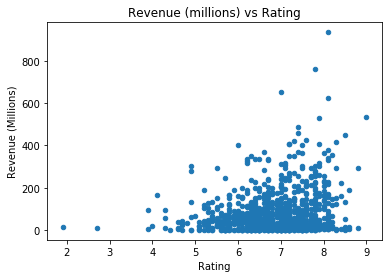

In [162]:
import matplotlib.pyplot as plt
movies_df.plot(kind='scatter', x='Rating', y='Revenue (Millions)', title='Revenue (millions) vs Rating');

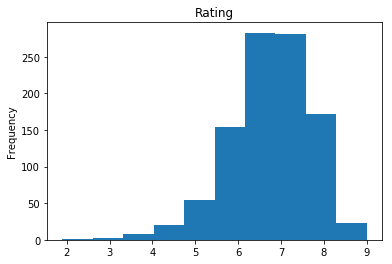

In [164]:
#If we want to plot a simple Histogram based on a single column, we can call plot on a column:
movies_df['Rating'].plot(kind='hist', title='Rating');

In [166]:
movies_df['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

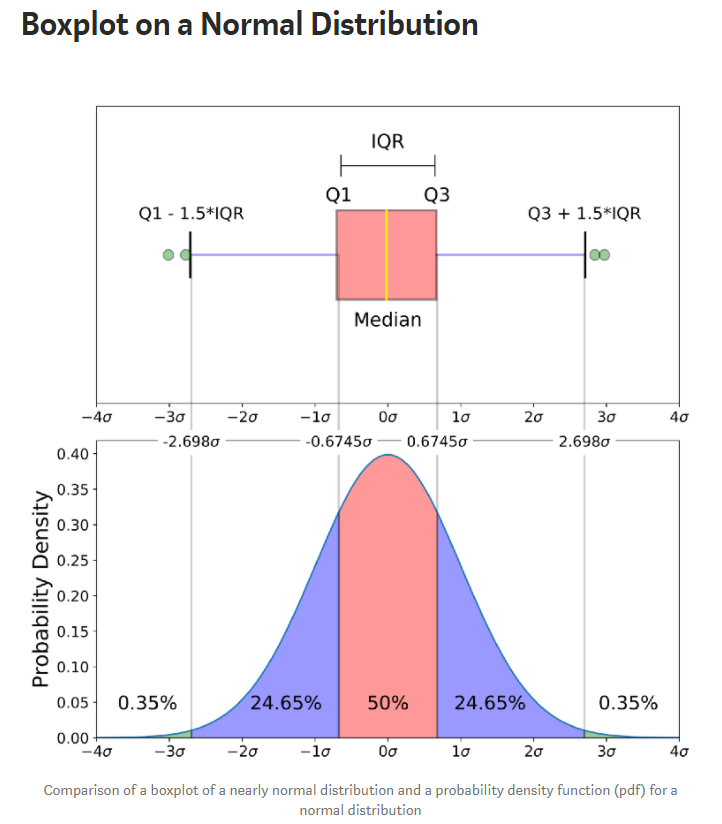
* **You need to have information on the variability or dispersion of the data.**
* **A boxplot is a graph that gives you a good indication of how the values in the data are spread out.**
* **median (Q2/50th Percentile): the middle value of the dataset.**
* **first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.**
* **third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.**
* **interquartile range (IQR): 25th to the 75th percentile.**
* **whiskers (shown in blue)**
* **outliers (shown as green circles)**
* **“maximum”: Q3 + 1.5*IQR**
* **“minimum”: Q1 -1.5*IQR**

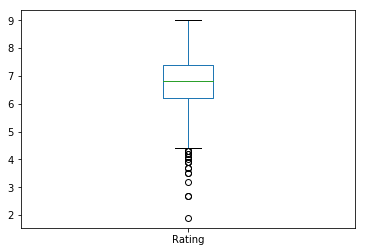

In [173]:
movies_df['Rating'].plot(kind="box");

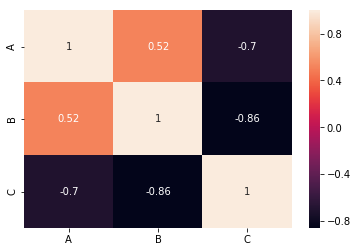

In [139]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'A': [45,37,42,35,39],
        'B': [38,31,26,28,33],
        'C': [10,15,17,21,12]
        }

df = pd.DataFrame(data,columns=['A','B','C'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [133]:
corrMatrix =movies_df.corr()

* **Get a Visual Representation of the Correlation Matrix using Seaborn and Matplotlib**
* **How to Create a Correlation Matrix using Pandas**

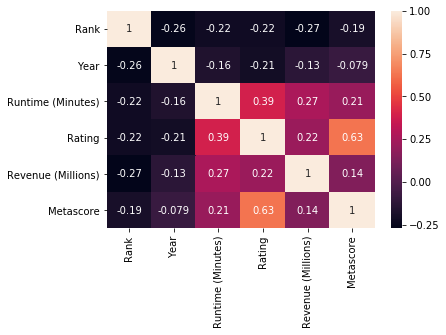

In [138]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix, annot=True)
plt.show()

 # Covariance Matrix
* **Covariance is the measure of the joint probability for two or more random variables.**
* **It describes how the two variables change together.**

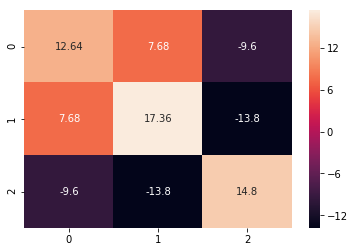

array([[ 12.64,   7.68,  -9.6 ],
       [  7.68,  17.36, -13.8 ],
       [ -9.6 , -13.8 ,  14.8 ]])

In [178]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

A = [45,37,42,35,39]
B = [38,31,26,28,33]
C = [10,15,17,21,12]

data = np.array([A,B,C])

covMatrix = np.cov(data,bias=True)
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

In [151]:
!pip install pandas_ml

You are using pip version 9.0.1, however version 20.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [213]:
import pandas as pd
import seaborn as sn
from pandas_ml import ConfusionMatrix
#from sklearn.metrics import confusion_matrix
data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
Confusion_Matrix = ConfusionMatrix(df['y_Actual'], df['y_Predicted'])
Confusion_Matrix.print_stats()


population: 12
P: 5
N: 7
PositiveTest: 6
NegativeTest: 6
TP: 4
TN: 5
FP: 2
FN: 1
TPR: 0.8
TNR: 0.7142857142857143
PPV: 0.6666666666666666
NPV: 0.8333333333333334
FPR: 0.2857142857142857
FDR: 0.3333333333333333
FNR: 0.2
ACC: 0.75
F1_score: 0.7272727272727273
MCC: 0.50709255283711
informedness: 0.5142857142857142
markedness: 0.5
prevalence: 0.4166666666666667
LRP: 2.8000000000000003
LRN: 0.28
DOR: 10.0
FOR: 0.16666666666666666


In [216]:
Confusion_Matrix

Predicted  False  True  __all__
Actual                         
False          5     2        7
True           1     4        5
__all__        6     6       12

In [201]:
type(Confusion_Matrix)

pandas_ml.confusion_matrix.bcm.BinaryConfusionMatrix

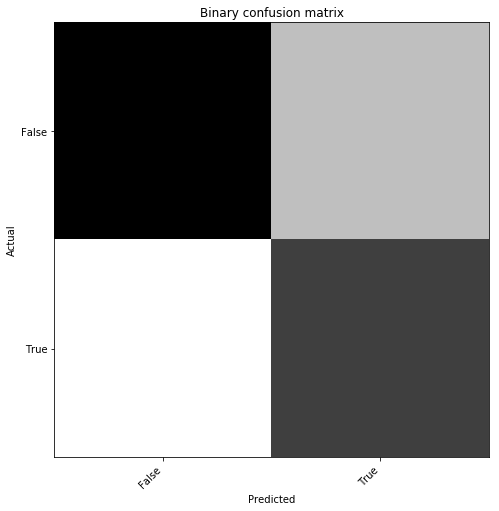

In [211]:
%matplotlib inline
import matplotlib.pyplot as plt
Confusion_Matrix.plot()